In [1]:
#데이터 불러오기
import pandas as pd
df = pd.read_csv("data/penguins.csv")
df.isna().sum()
#sex에 11개가 데이터가 비어있다. 총 344개 중 11개는 3%에 해당한다.

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [2]:
## 1. null 값 삭제
df.dropna(inplace=True)
df.drop("rowid" , axis=1 , inplace=True)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [4]:
df["species_cat"]= df["species"].astype('category').cat.codes
df["island_cat"]= df["island"].astype('category').cat.codes
df["sex_cat"]= df["sex"].astype('category').cat.codes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
 8   species_cat        333 non-null    int8   
 9   island_cat         333 non-null    int8   
 10  sex_cat            333 non-null    int8   
dtypes: float64(4), int64(1), int8(3), object(3)
memory usage: 24.4+ KB


In [6]:
X=df.drop(["species","island","sex","species_cat"], axis=1)
y=df["species_cat"]

In [7]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_cat,sex_cat
0,39.1,18.7,181.0,3750.0,2007,2,1
1,39.5,17.4,186.0,3800.0,2007,2,0
2,40.3,18.0,195.0,3250.0,2007,2,0
4,36.7,19.3,193.0,3450.0,2007,2,0
5,39.3,20.6,190.0,3650.0,2007,2,1
...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,1,1
340,43.5,18.1,202.0,3400.0,2009,1,0
341,49.6,18.2,193.0,3775.0,2009,1,1
342,50.8,19.0,210.0,4100.0,2009,1,1


In [8]:
y

0      0
1      0
2      0
4      0
5      0
      ..
339    1
340    1
341    1
342    1
343    1
Name: species_cat, Length: 333, dtype: int8

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
knn.score(X_test, y_test)

0.7857142857142857

array([[<Axes: xlabel='bill_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_depth_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='flipper_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>],
       [<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>,
        <Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>,
        <Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>,
        <

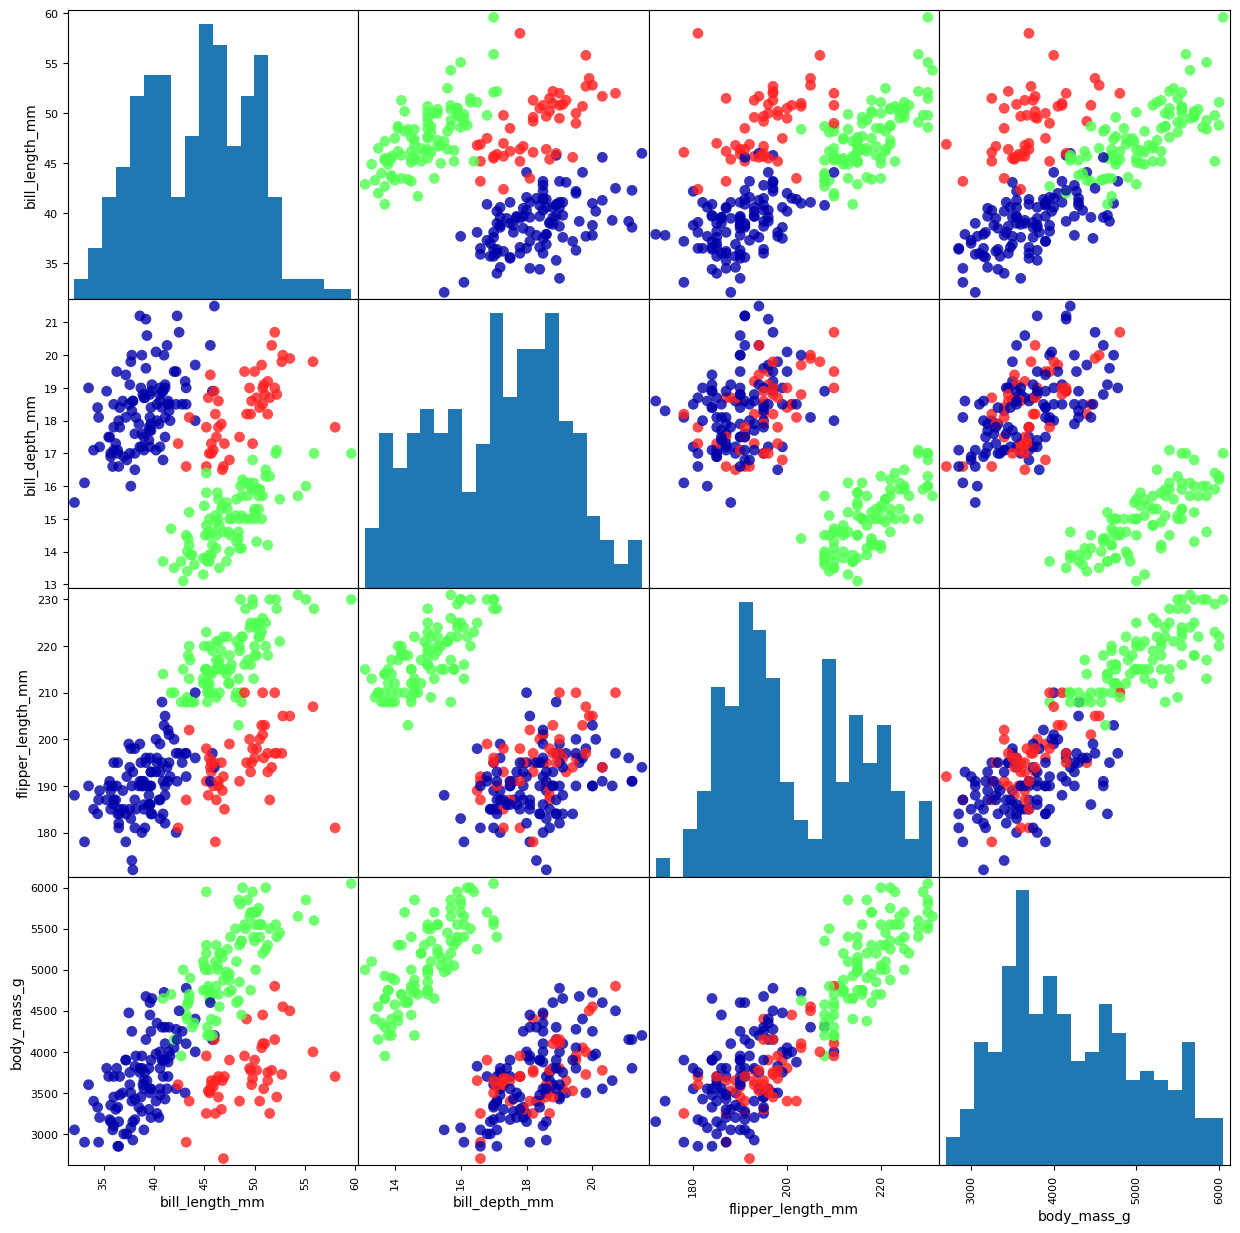

In [14]:
import pandas as pd
import mglearn
#terminal에서 pip install imageio
df_dataframe =pd.DataFrame(X_train, columns=['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',
                                             	'body_mass_g'])
pd.plotting.scatter_matrix(df_dataframe,  # The dataframe containing the data
                           c=y_train,       # Color by y_train values
                           figsize=(15,15), # Figure size
                           marker='o',      # Marker style
                           hist_kwds={'bins': 20},  # Keyword arguments for histogram bins
                           s=60,            # Marker size
                           alpha=0.8,       # Transparency of markers
                           cmap=mglearn.cm3  # Color map
                          )